# 주성분 분석

In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #n_components 특성을 몇개로 압축할 것인가
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
pca.components_.shape

(50, 10000)

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


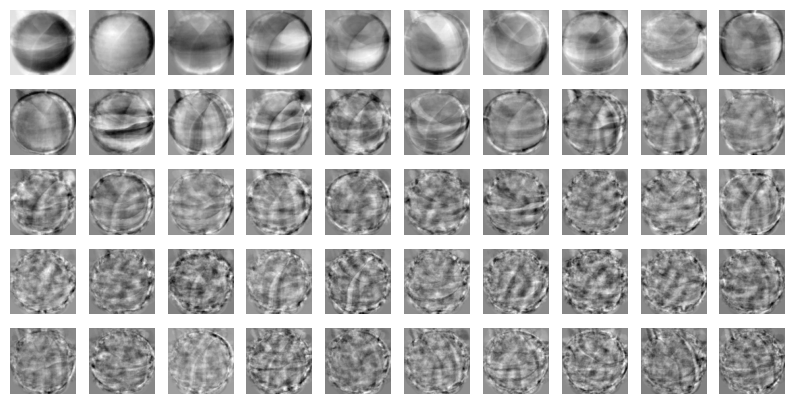

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
fruits_2d.shape

(300, 10000)

In [12]:
fruits_pca = pca.transform(fruits_2d) # 원본데이터 압축
fruits_pca.shape

(300, 50)

In [17]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 원본데이터 복원 - 완벽하게 복원 불가 
fruits_inverse.shape

(300, 10000)

In [18]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

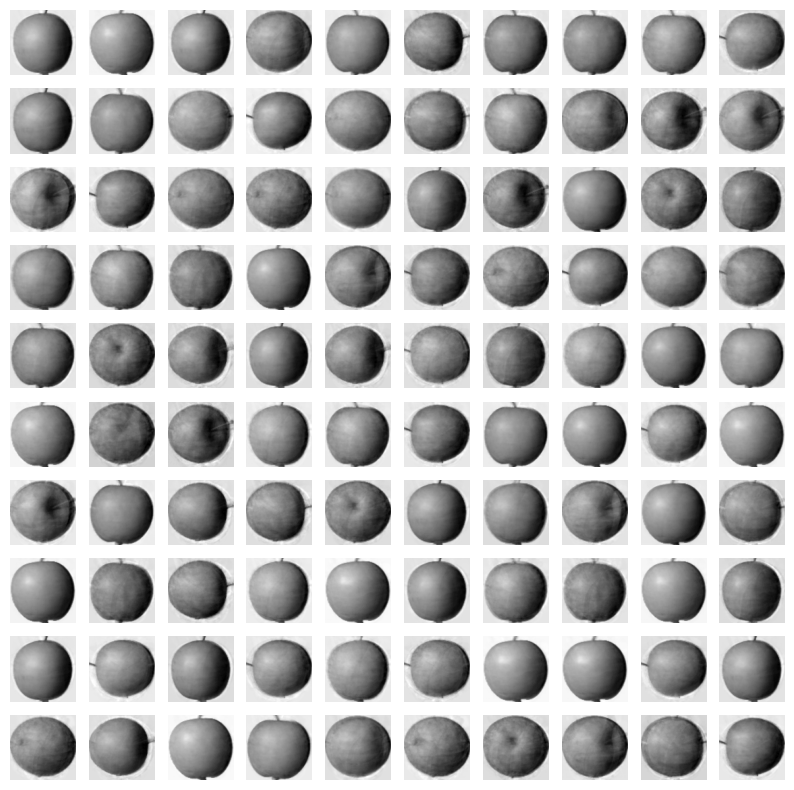

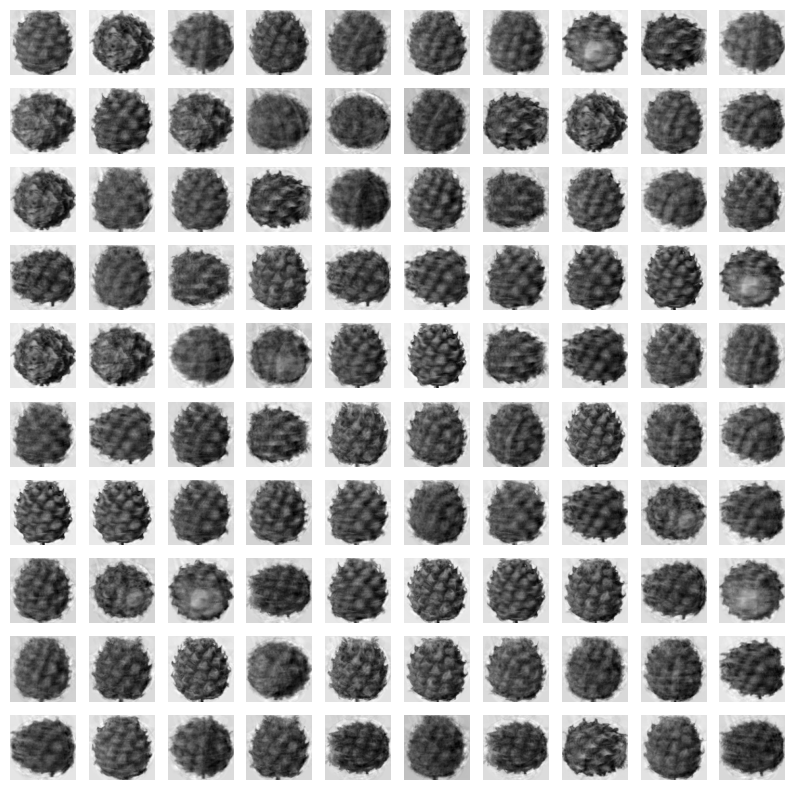

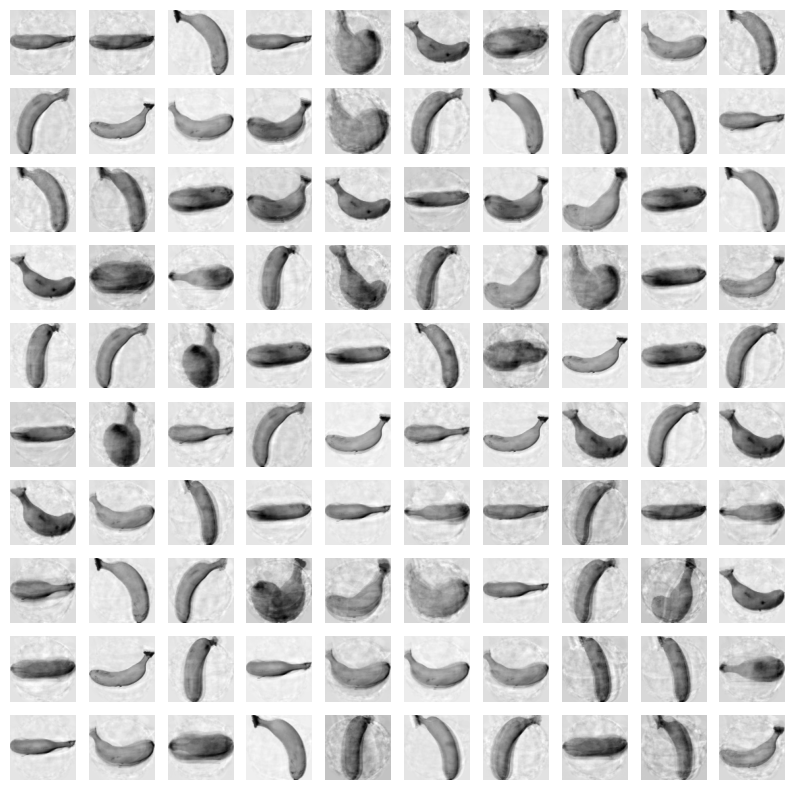

In [19]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [20]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511201, 0.00486382, 0.00480346,
       0.00447837, 0.00437319, 0.00408036, 0.00389478, 0.00372446,
       0.00359282, 0.00331474, 0.0031784 , 0.00304345, 0.00303669,
       0.0028887 , 0.00275851, 0.00264957, 0.00255937, 0.00252115,
       0.00247426, 0.00239297, 0.00231041, 0.00222121, 0.00216991,
       0.0021394 , 0.00195641, 0.0019326 , 0.00190752, 0.00184267,
       0.00180775, 0.00172248, 0.00169594, 0.00161938, 0.00160523])

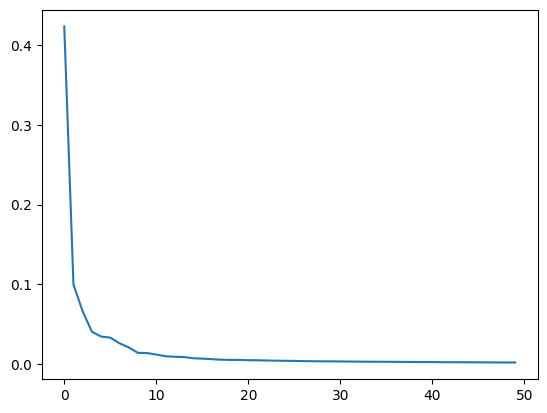

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [25]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.16477275, 0.12652445, 0.12000585, 0.11869669, 0.12656665]),
 'score_time': array([0.0020051 , 0.00296259, 0.00200129, 0.00200081, 0.00200057]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [26]:
scores = cross_validate(lr, fruits_pca, target)
scores

{'fit_time': array([0.01000071, 0.00400019, 0.00499988, 0.00681329, 0.00903511]),
 'score_time': array([0.00099945, 0.        , 0.00072813, 0.00100017, 0.00099683]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [27]:
pca = PCA(n_components=0.5)  #n_components 소수점 잘설명된분산의 합이 50%가 될 때까지 주성분 찾기
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [29]:
pca.n_components_ # -> 분산의 합이 50%되는 주성분 3개

np.int64(2)

In [30]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [31]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'fit_time': array([0.0293448 , 0.01000571, 0.01104784, 0.00599027, 0.01201034]),
 'score_time': array([0.00103641, 0.00095797, 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

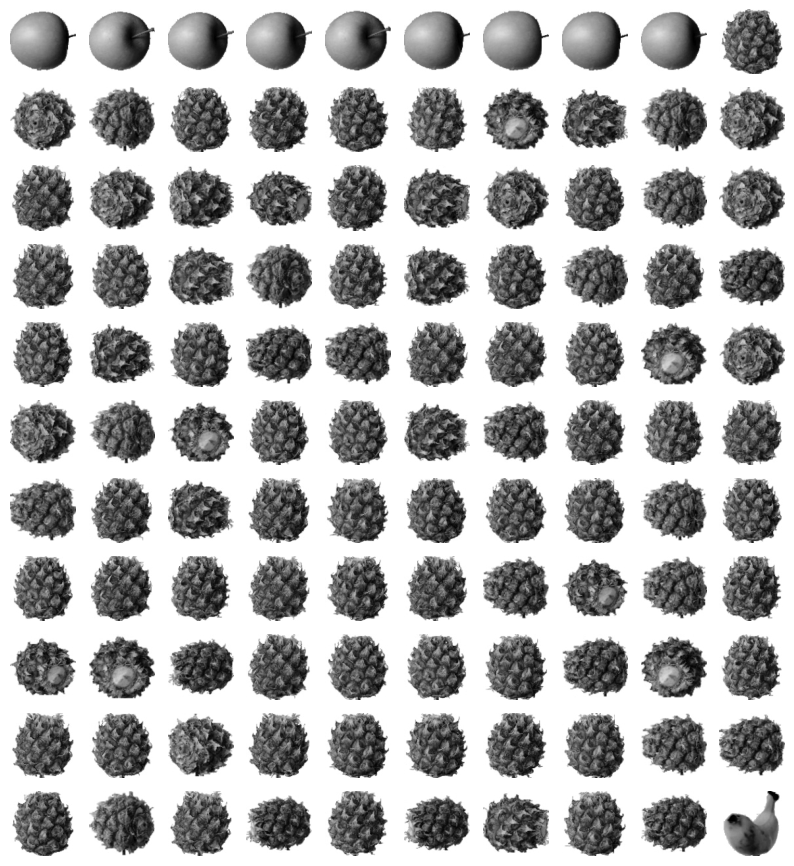

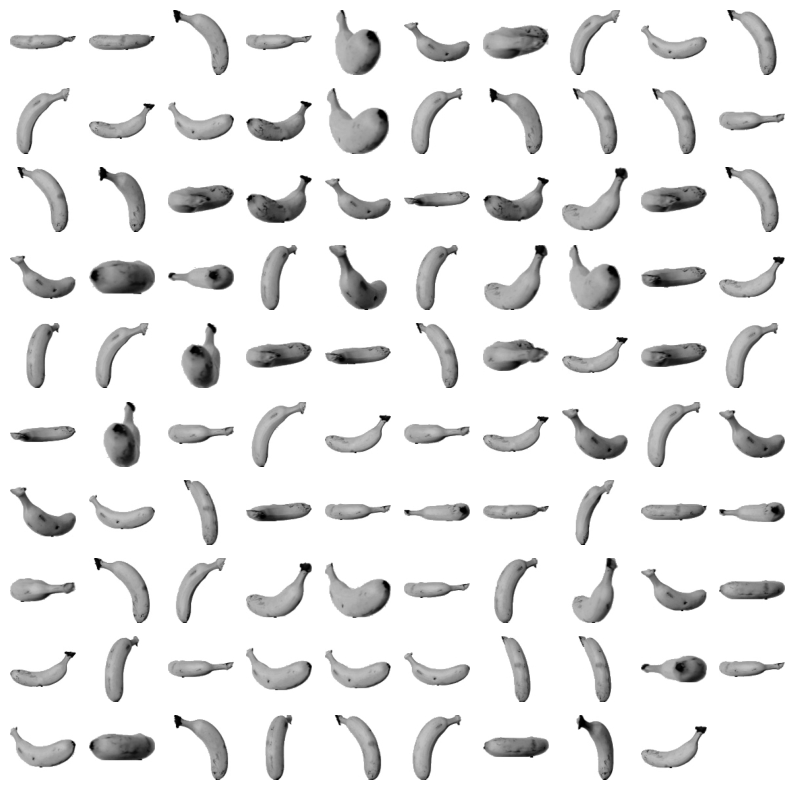

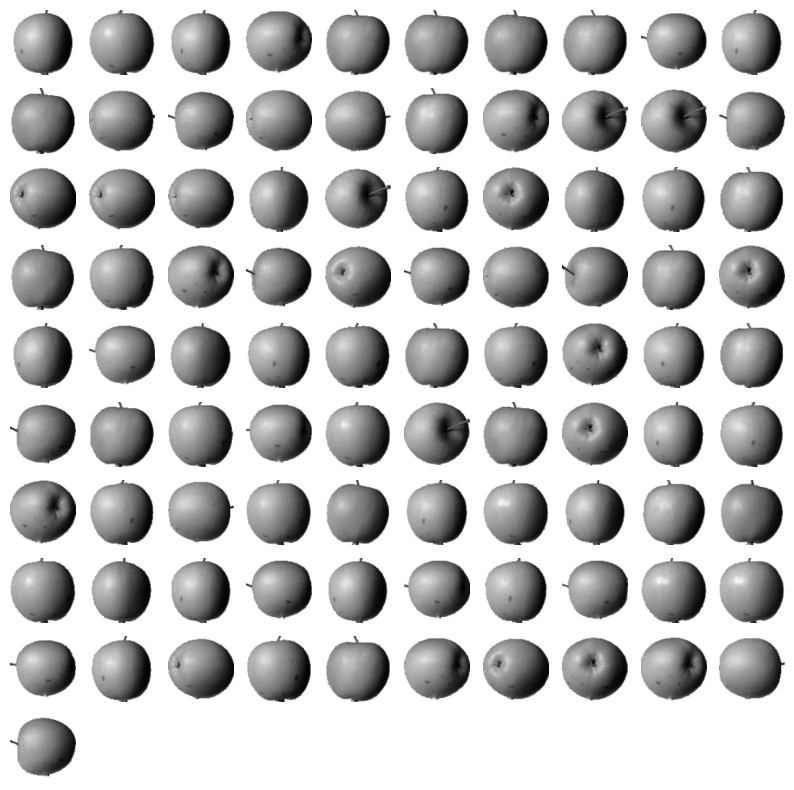

In [33]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

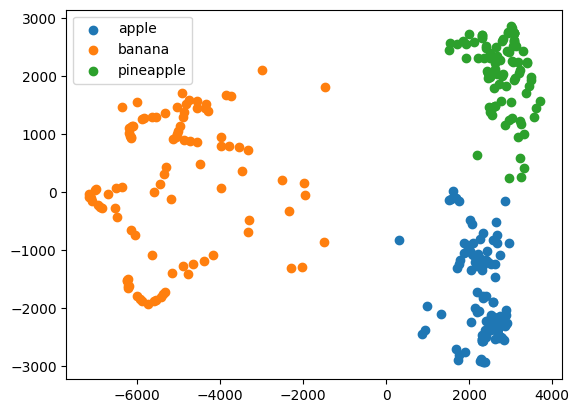

In [35]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()